When we are dealing with machine learning datasets, many times, we have higher dimensional data than just the easy 2 dimensions. This makes us difficult to visualize the data to get a sense how different dimensions have a relationship with each other, or is there a hidden structure inside it. Today, I will show you what is my way to visualize the higher dimensional datasets. 

I summarize the way to visualize high dimensional data into 2 groups:

1. Using algorithms 
2. Clever way to plot

Let's first see how to use algorithms to visualize the data. In this blog, we will use the [IRIS dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to show how different methods work. 

### Let's first load data

In [27]:
from sklearn import datasets

In [43]:
# import the IRIS data
iris = datasets.load_iris()
iris_data = iris.data
Y = iris.target

print('There are %d features'%(iris_data.shape[1]))
print('There are %d classes'%(len(set(Y))))

There are 4 features
There are 3 classes


### Visualize high dimensional data with PCA

Principal Component Analysis is the classical way to reduce the dimensions. In our case, we have 4 features, which means we have 4 dimensions, difficult to visualize. With PCA, we can plot the first two components, and get a sense of the patterns hidden behind the data. 

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-poster')

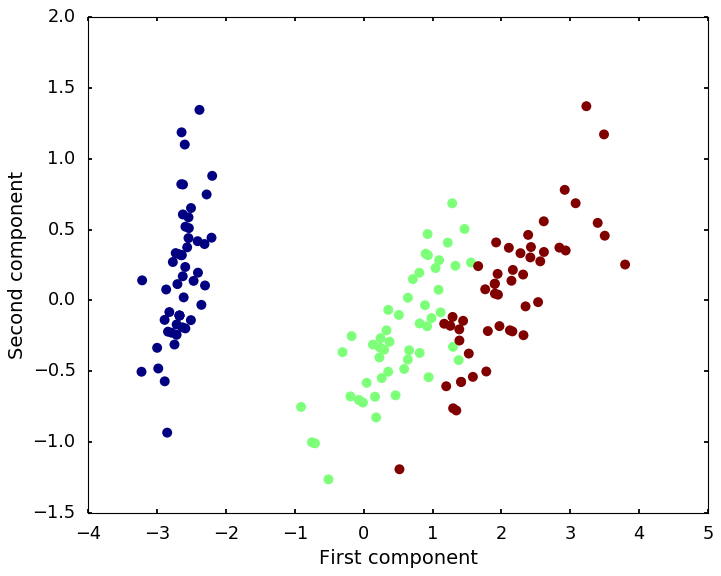

In [51]:
# Let's do a simple PCA and plot the first two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_data)

# plot the first two components
plt.figure(figsize = (10, 8))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = Y, s = 80, linewidths=0)
plt.xlabel('First component')
plt.ylabel('Second component')

The above figure is showing the first two components of the PCA. I colored the dots with the 3 classes so that we can see the hidden structures. 

### Visualize high dimensional data with t-SNE

[t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

In [39]:
from sklearn.manifold import TSNE

In [47]:
X_tsne = TSNE(learning_rate=100).fit_transform(iris_data)

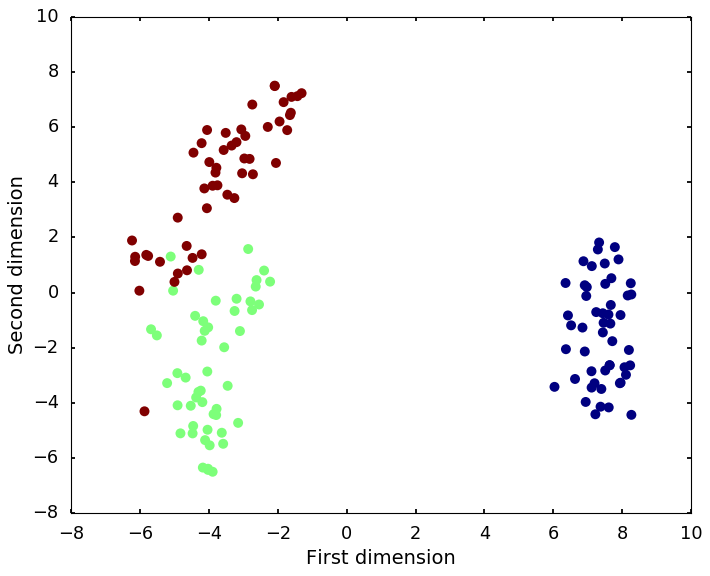

In [53]:
# plot the first two components
plt.figure(figsize = (10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c = Y, s = 80, linewidths=0)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')